In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import  Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
import keras
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,average_precision_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import auc
from sklearn.ensemble import BaggingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as pip
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import calibration_curve

In [2]:
mic_df=pd.read_csv("C:\\BIG DATA\\thesis\\12045261\\Myocardial infarction complications Database.csv")
mic_df
mic_df.loc[mic_df.LET_IS!=0,'LET_IS']=1 #To LET_IS einai multiclass. Ayti i grammi to kanei binary 0=zisane. 1=pethanane

In [3]:
#Οι στηλες IBS_NASL, KFK_BLOOD,ΚΑΘΩΣ ΚΑΙ ΟΙ ,S_AD_KBRIG,D_AD_KBRIG αποτελουνται σχεδον αποκλειστικα απο missing values και γινονται drop. Drop kanoume episis kai to id
mic_df.drop(["ID","IBS_NASL","KFK_BLOOD","S_AD_KBRIG","D_AD_KBRIG"],inplace=True,axis=1)
#mic_df.drop(["ID","IBS_NASL","KFK_BLOOD"],inplace=True,axis=1)
numeric_features=["AGE","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD","ALT_BLOOD","AST_BLOOD","L_BLOOD","ROE","INF_ANAM","STENOK_AN","FK_STENOK","GB","DLIT_AG","TIME_B_S","R_AB_1_n","R_AB_2_n","R_AB_3_n","NA_R_1_n","NA_R_2_n","NA_R_3_n","NOT_NA_1_n","NOT_NA_2_n","NOT_NA_3_n"]

for col in numeric_features:
        print(col)
        print(mic_df.loc[(mic_df["LET_IS"]==0),col].mean())
        print(mic_df.loc[(mic_df["LET_IS"]!=0),col].mean())

AGE
60.85573539760732
67.1070110701107
S_AD_ORIT
138.34476843910807
118.18352059925094
D_AD_ORIT
85.18010291595198
72.13483146067416
K_BLOOD
4.188147497805092
4.211052631578947
NA_BLOOD
136.60616740088105
136.22105263157894
ALT_BLOOD
0.4833472106577852
0.4708837209302326
AST_BLOOD
0.2608666666666667
0.27962790697674417
L_BLOOD
8.542246108228317
10.219469026548675
ROE
12.970519782777346
16.384615384615383
INF_ANAM
0.5196078431372549
0.7425373134328358
STENOK_AN
2.147685525349008
3.300429184549356
FK_STENOK
1.1529073941134242
1.517094017094017
GB
1.3550420168067228
1.6007604562737643
DLIT_AG
3.1962692619626925
4.1506849315068495
TIME_B_S
4.890991672975019
3.6047430830039526
R_AB_1_n
0.28421052631578947
0.49034749034749037
R_AB_2_n
0.1256140350877193
0.2694610778443114
R_AB_3_n
0.061095505617977525
0.23648648648648649
NA_R_1_n
0.4297752808988764
0.7749077490774908
NA_R_2_n
0.08567415730337079
0.16666666666666666
NA_R_3_n
0.04992967651195499
0.14285714285714285
NOT_NA_1_n
0.323488045007032

In [4]:
target_variable="LET_IS"
scenario=5
to_drop_list3=["R_AB_3_n","NA_R_3_n","NOT_NA_3_n"]
to_drop_list2=["R_AB_2_n","NA_R_2_n","NOT_NA_2_n"]
to_drop_list1=["R_AB_1_n","NA_R_1_n","NOT_NA_1_n"]
to_drop_list2.extend(to_drop_list3)
to_drop_list1.extend(to_drop_list2)


In [5]:
y=mic_df[target_variable]
if scenario==5:
    x = mic_df.drop([target_variable], axis=1)
elif scenario==4:
    x = mic_df.loc[: ,"AGE":"TRENT_S_n"]
elif scenario==3:
    df3 = mic_df.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list3, axis=1)
elif scenario==2:
    df3 =  mic_df.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list2, axis=1)
elif scenario==1:
    df3 = mic_df.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list1, axis=1)
x


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,1,0,1,0,0,0,0
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,NaN,...,0,0,0,0,1,0,0,0,0,0


In [6]:
#Αντικατασταση missing values με τον ιδιο τροπο με τον απο κατω αλλα μεσω ColumnTransformer προκειμενου να χρησιμοποιηθει μετα σε αλλο pipeline μαζι με cross validation Και να ναι 
#απολυτα σωστο χωρις ιχνος data leakage

numeric_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean")),("scaler",StandardScaler())])
l1=x.columns.values.tolist()#Παιρνω τα ονοματα ολων των στηλων σε λιστα

categorical_features = [x for x in l1 if x not in numeric_features]#Απο την παραπανω λιστα αφαιρω τα ονοματα ΤΩΝ CONTINUOUS FEATURES

categorical_transformer =Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)      
    ]
)

In [7]:
#PCA ME PIPELINE!
'''pca = PCA()
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("pca",pca)])
pipe1.fit(x)
pca_data = pipe1.transform(x)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


#Ο παρακατω κωδικα μας δινει αθροιστικη διακυμανση ανα πληθος principal components
plt.figure( figsize = (10,8))
plt.plot(range(1,len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', alpha=0.4)
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")'''

'pca = PCA()\npipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("pca",pca)])\npipe1.fit(x)\npca_data = pipe1.transform(x)\n\nper_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)\nlabels = [\'PC\' + str(x) for x in range(1, len(per_var)+1)]\nplt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)\nplt.ylabel(\'Percentage of Explained Variance\')\nplt.xlabel(\'Principal Component\')\nplt.title(\'Scree Plot\')\nplt.show()\n\n\n#Ο παρακατω κωδικα μας δινει αθροιστικη διακυμανση ανα πληθος principal components\nplt.figure( figsize = (10,8))\nplt.plot(range(1,len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = \'o\', linestyle = \'--\', alpha=0.4)\nplt.title("Explained Variance by Components")\nplt.xlabel("Number of Components")\nplt.ylabel("Cumulative Explained Variance")'

# Define Pipelines

In [15]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ("XGboost", XGBClassifier(use_label_encoder=False))])

In [11]:
#Pipelines me PCA
'''pipe1 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(30)), ("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(30)), ("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(30)), ("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(30)), ("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(30)), ("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(30)), ("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor),("pca",PCA(30)), ("XGboost", XGBClassifier(use_label_encoder=False))])'''

In [ ]:
#Looking for correlations... No important correlations found!
'''for col in numeric_features:
        mic_df[col].fillna(value=mic_df[col].mean(),inplace=True)
        
#Αντικατασταση missing values με most common value (=mode) για τις υπολοιπες στηλες
mic_df=mic_df.fillna(mic_df.mode().iloc[0])


#min-max scaler
#X_train_norm=X_train.copy()
#X_test_norm=X_test.copy()
for c in numeric_features:
    norm=MinMaxScaler().fit(mic_df[[c]])    
    mic_df[c]=norm.transform(mic_df[[c]])
    mic_df[c]=norm.transform(mic_df[[c]])


cor=mic_df.corr()
cor_target = abs(cor[target_variable])
relevant_features = cor_target[cor_target>0.3]
relevant_features'''

# Simple Cross Validation

In [16]:
pipes=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7]
scoring = {'accuracy': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1'}
names=['SVM','Random Forest','Decision Tree','Logistic Regression','AdaBoost','Gradient Boosting','XGboost']    
    
    # define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
for pipe,name in zip(pipes,names):
    scores=cross_validate(pipe,x,y,cv=cv,scoring=scoring )
    print(name)
    print("accuracy=%.3f" % scores["test_accuracy"].mean())
    print("precision=%.3f" % scores["test_precision"].mean())
    print("recall=%.3f" % scores["test_recall"].mean())
    print("f1=%.3f" % scores["test_f1"].mean())

SVM
accuracy=0.899
precision=0.751
recall=0.562
f1=0.637
Random Forest
accuracy=0.931
precision=0.981
recall=0.580
f1=0.724
Decision Tree
accuracy=0.896
precision=0.680
recall=0.671
f1=0.672
Logistic Regression
accuracy=0.905
precision=0.756
recall=0.597
f1=0.663
AdaBoost
accuracy=0.926
precision=0.823
recall=0.685
f1=0.745
Gradient Boosting
accuracy=0.933
precision=0.899
recall=0.656
f1=0.754
[08:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t

# HYPERPARAMETER TUNING WITH GRISEARCHCV

## Define param grids

In [9]:
svm_c_range=np.arange(0.01,0.2,0.01)
param_grid1 = {"SVM__C":svm_c_range}

class_weights=['balanced','balanced_subsample']
max_depth_range=np.arange(4,10)
param_grid2 = {"Random Forest__max_depth":max_depth_range,"Random Forest__class_weight":class_weights}

max_leaf_nodes_range=np.arange(3,10)
param_grid3 = {"Decision Tree__max_depth":max_depth_range,"Decision Tree__max_leaf_nodes":max_leaf_nodes_range}

log_reg_pen=["l1","l2"]
log_reg_c=np.arange(0.1,0.5,0.05)
param_grid4 = {"Logistic Regression__penalty":log_reg_pen,"Logistic Regression__C":log_reg_c}

estimators=np.arange(50,400,50)
param_grid5 ={"AdaBoost__n_estimators":estimators}

grad_boost_lrate=np.arange(0.01,0.21,0.01)
param_grid6 ={"Gradient Boosting__n_estimators":estimators,"Gradient Boosting__learning_rate":grad_boost_lrate}

scale_pos_weight=np.arange(1,7)
param_grid7 ={"XGboost__scale_pos_weight":scale_pos_weight}

In [22]:
def evaluate_pipelines(pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7):
#Me tin parakatw grammi orizeis 1 metriki tin opoia de mporeis na oriseis xerata opws tis upoloipes kathws den anikei stis dunates times tou scoring
#scoring = {'acc': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1',"matt":make_scorer(matthews_corrcoef)}
    scoring = {'accuracy': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1'}
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define grid
    for pgrid, est in zip((param_grid1, param_grid2,
                                param_grid3, param_grid4, param_grid5,param_grid6,param_grid7),
                                (pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7)):  
        
        # define grid search
        grid = GridSearchCV(estimator=est, param_grid=pgrid, n_jobs=-1, cv=cv,scoring=scoring,refit="accuracy")
        # execute the grid search
        grid_result = grid.fit(x, y)
        # report the best configuration
        #print(c["name"])
        print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
        
        # report all configurations
        for scorer in zip(sorted(scoring)):
            print(scorer)
            means = grid_result.cv_results_['mean_test_%s' % scorer]
            stds = grid_result.cv_results_['std_test_%s' % scorer]
            params = grid_result.cv_results_['params']

            for mean, stdev, param in zip(means, stds, params):
                
                print('%f (%f) with: %r' % (mean, stdev, param))

In [11]:
evaluate_pipelines(pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7)

Best: 0.908627 using {'SVM__C': 0.16}
('accuracy',)
0.874510 (0.019172) with: {'SVM__C': 0.01}
0.888431 (0.020005) with: {'SVM__C': 0.02}
0.896667 (0.018644) with: {'SVM__C': 0.03}
0.900392 (0.016771) with: {'SVM__C': 0.04}
0.901569 (0.015334) with: {'SVM__C': 0.05}
0.902353 (0.016471) with: {'SVM__C': 0.060000000000000005}
0.904510 (0.016336) with: {'SVM__C': 0.06999999999999999}
0.904314 (0.017577) with: {'SVM__C': 0.08}
0.905882 (0.019152) with: {'SVM__C': 0.09}
0.905686 (0.017744) with: {'SVM__C': 0.09999999999999999}
0.906471 (0.017929) with: {'SVM__C': 0.11}
0.906863 (0.018792) with: {'SVM__C': 0.12}
0.907255 (0.018951) with: {'SVM__C': 0.13}
0.907255 (0.018767) with: {'SVM__C': 0.14}
0.907647 (0.018979) with: {'SVM__C': 0.15000000000000002}
0.908627 (0.018461) with: {'SVM__C': 0.16}
0.908235 (0.018639) with: {'SVM__C': 0.17}
0.907647 (0.018235) with: {'SVM__C': 0.18000000000000002}
0.907059 (0.018377) with: {'SVM__C': 0.19}
('f1',)
0.391596 (0.129501) with: {'SVM__C': 0.01}
0.50

# BEST MODELS RE-EVALUATION WITH CV

In [12]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("SVM", SVC(kernel='linear',C=0.16))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ("Random Forest", RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced_subsample'))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ("Decision Tree", DecisionTreeClassifier(max_depth=4,random_state=1234,max_leaf_nodes=4))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ("Logistic Regression", LogisticRegression(penalty='l1',solver='liblinear',random_state=1234,max_iter=10000,C=0.35))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ("AdaBoost", AdaBoostClassifier(n_estimators=100, random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ("Gradient Boosting", GradientBoostingClassifier(n_estimators=150, learning_rate=0.14, random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ("XGboost", XGBClassifier(use_label_encoder=False))])

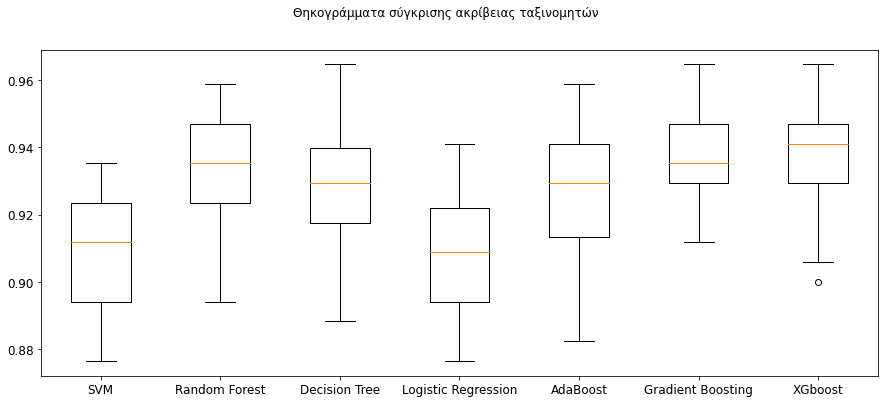

In [13]:
models = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7]
results=[]
names=['SVM','Random Forest','Decision Tree','Logistic Regression','AdaBoost','Gradient Boosting','XGboost']
#models.append(pipe1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
for model in models:
    cv_results = cross_val_score(model, x, y, cv=cv,n_jobs=-1)
    results.append(cv_results)
#names.append(name)
fig = plt.figure(figsize=(15,6))
fig.suptitle('Θηκογράμματα σύγκρισης ακρίβειας ταξινομητών')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()    

# Voting Classifier

In [27]:
scoring = {'accuracy': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1'}
params = {'voting':['hard', 'soft'],
          'weights':[(1,1,1), (2,1,1), (1,2,1), (1,1,2)]}
vc = VotingClassifier([('clf1', pipe7), ('clf2', pipe6), ('clf3', pipe5)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(vc, params, n_jobs=-1, cv=cv,scoring=scoring,refit="accuracy")
grid_result =grid.fit(x, y)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
        
        # report all configurations
for scorer in zip(sorted(scoring)):
    print(scorer)
    means = grid_result.cv_results_['mean_test_%s' % scorer]
    stds = grid_result.cv_results_['std_test_%s' % scorer]
    params = grid_result.cv_results_['params']

    for mean, stdev, param in zip(means, stds, params):
        
        print('%f (%f) with: %r' % (mean, stdev, param))

[01:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.938627 using {'voting': 'soft', 'weights': (1, 1, 2)}
('accuracy',)
0.935686 (0.014720) with: {'voting': 'hard', 'weights': (1, 1, 1)}
0.936078 (0.014783) with: {'voting': 'hard', 'weights': (2, 1, 1)}
0.934118 (0.015667) with: {'voting': 'hard', 'weights': (1, 2, 1)}
0.931569 (0.014206) with: {'voting': 'hard', 'weights': (1, 1, 2)}
0.938235 (0.015470) with: {'voting': 'soft', 'weights': (1, 1, 1)}
0.937255 (0.016452) with: {'voting': 'soft', 'weights': (2, 1, 1)}
0.937255 (0.015881) with: {'voting': 'soft', 'weights': (1, 2, 1)}
0.938627 (0.014779) with: {'voting': 'soft', 'weights': (1, 1, 2)}
('f1',)
0.766519 (0.064488) with: {'voting': 'hard', 'weights': (1, 1, 1)}
0.7

# TOMEK LINKS

In [14]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ('under', TomekLinks()),("XGboost", XGBClassifier(use_label_encoder=False))])

In [15]:
evaluate_pipelines(pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7)

Best: 0.907451 using {'SVM__C': 0.09}
('accuracy',)
0.878039 (0.020088) with: {'SVM__C': 0.01}
0.890196 (0.021443) with: {'SVM__C': 0.02}
0.896471 (0.019006) with: {'SVM__C': 0.03}
0.901373 (0.018269) with: {'SVM__C': 0.04}
0.903922 (0.017273) with: {'SVM__C': 0.05}
0.906275 (0.017313) with: {'SVM__C': 0.060000000000000005}
0.906275 (0.017643) with: {'SVM__C': 0.06999999999999999}
0.907451 (0.018285) with: {'SVM__C': 0.08}
0.907451 (0.018158) with: {'SVM__C': 0.09}
0.907059 (0.018188) with: {'SVM__C': 0.09999999999999999}
0.907059 (0.018564) with: {'SVM__C': 0.11}
0.907255 (0.018829) with: {'SVM__C': 0.12}
0.906667 (0.019375) with: {'SVM__C': 0.13}
0.906667 (0.018893) with: {'SVM__C': 0.14}
0.906863 (0.019217) with: {'SVM__C': 0.15000000000000002}
0.907255 (0.019193) with: {'SVM__C': 0.16}
0.907451 (0.019268) with: {'SVM__C': 0.17}
0.906863 (0.019632) with: {'SVM__C': 0.18000000000000002}
0.906863 (0.018975) with: {'SVM__C': 0.19}
('f1',)
0.427595 (0.122211) with: {'SVM__C': 0.01}
0.52

# GRIDSEARCH PARAMETERS FOR PROBABILITY CALIBRATION

In [16]:
scoring = {'accuracy': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1'}
names=['SVM','Random Forest','Decision Tree','Logistic Regression','AdaBoost','Gradient Boosting','XGboost']
models = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7]
for model,name in zip(models,names):
    calibrated = CalibratedClassifierCV(model)
    # define grid
    param_grid = dict(cv=[2,3,4,5], method=['sigmoid','isotonic'])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define grid search
    grid = GridSearchCV(estimator=calibrated, param_grid=param_grid, n_jobs=-1, cv=cv,scoring=scoring,refit="accuracy",return_train_score=True)
    grid_result = grid.fit(x, y)
    # report the best configuration
    print(name)
    print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
    # report all configurations
    for scorer in zip(sorted(scoring)):
        print(scorer)
        means = grid_result.cv_results_['mean_test_%s' % scorer]
        stds = grid_result.cv_results_['std_test_%s' % scorer]
        params = grid_result.cv_results_['params']
        for mean, stdev, param in zip(means, stds, params):
            print('%f (%f) with: %r' % (mean, stdev, param))

SVM
Best: 0.901961 using {'cv': 4, 'method': 'sigmoid'}
('accuracy',)
0.890000 (0.012721) with: {'cv': 2, 'method': 'sigmoid'}
0.894118 (0.015563) with: {'cv': 2, 'method': 'isotonic'}
0.899020 (0.012624) with: {'cv': 3, 'method': 'sigmoid'}
0.899804 (0.015819) with: {'cv': 3, 'method': 'isotonic'}
0.901961 (0.013948) with: {'cv': 4, 'method': 'sigmoid'}
0.900980 (0.017587) with: {'cv': 4, 'method': 'isotonic'}
0.901961 (0.015289) with: {'cv': 5, 'method': 'sigmoid'}
0.900196 (0.015746) with: {'cv': 5, 'method': 'isotonic'}
('f1',)
0.499868 (0.079153) with: {'cv': 2, 'method': 'sigmoid'}
0.539127 (0.096193) with: {'cv': 2, 'method': 'isotonic'}
0.568926 (0.073146) with: {'cv': 3, 'method': 'sigmoid'}
0.586802 (0.081547) with: {'cv': 3, 'method': 'isotonic'}
0.595659 (0.079384) with: {'cv': 4, 'method': 'sigmoid'}
0.609318 (0.079281) with: {'cv': 4, 'method': 'isotonic'}
0.611939 (0.080166) with: {'cv': 5, 'method': 'sigmoid'}
0.598846 (0.079647) with: {'cv': 5, 'method': 'isotonic'}
('

# TRAIN TEST SPLIT

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

## Missing value imputation + min-max scaler on train-test split

In [9]:
#Αντικατασταση missing values με mean στηλης για στηλες με συνεχεις τιμες
for col in numeric_features:
        X_train[col].fillna(value=X_train[col].mean(),inplace=True)
        X_test[col].fillna(value=X_test[col].mean(),inplace=True)
#Αντικατασταση missing values με most common value (=mode) για τις υπολοιπες στηλες
X_train=X_train.fillna(X_train.mode().iloc[0])
X_test=X_test.fillna(X_test.mode().iloc[0])

#min-max scaler
X_train_norm=X_train.copy()
X_test_norm=X_test.copy()
for c in numeric_features:
    norm=MinMaxScaler().fit(X_train_norm[[c]])    
    X_train_norm[c]=norm.transform(X_train_norm[[c]])
    X_test_norm[c]=norm.transform(X_test_norm[[c]])

# RELIABILITY CURVES

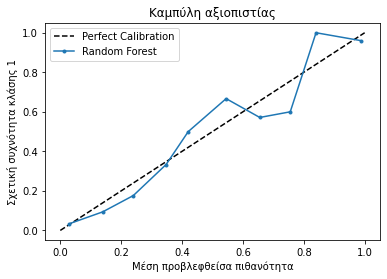

In [18]:
 
# predict calibrated probabilities
def calibrated(X_train_norm, X_test_norm, y_train):
	# define model
	model = RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced_subsample')
	# define and fit calibration model
	calibrated = CalibratedClassifierCV(model, method='isotonic', cv=5)
	calibrated.fit(X_train_norm, y_train)
	# predict probabilities
	return calibrated.predict_proba(X_test_norm)[:, 1]
 

yhat_calibrated = calibrated(X_train_norm, X_test_norm, y_train)

fop_calibrated, mpv_calibrated = calibration_curve(y_test, yhat_calibrated, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.plot(mpv_calibrated, fop_calibrated, marker='.')
plt.title("Καμπύλη αξιοπιστίας")
plt.xlabel("Mέση προβλεφθείσα πιθανότητα")
plt.ylabel("Σχετική συχνότητα κλάσης 1")
plt.legend(["Perfect Calibration","Random Forest"])
plt.show()

[22:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

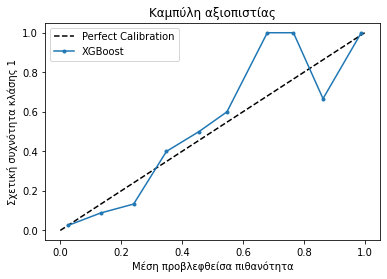

In [ ]:
 
# predict calibrated probabilities
def calibrated(X_train_norm, X_test_norm, y_train):
	# define model
	model = XGBClassifier(use_label_encoder=False)
	# define and fit calibration model
	calibrated = CalibratedClassifierCV(model, method='isotonic', cv=5)
	calibrated.fit(X_train_norm, y_train)
	# predict probabilities
	return calibrated.predict_proba(X_test_norm)[:, 1]
 

yhat_calibrated = calibrated(X_train_norm, X_test_norm, y_train)

fop_calibrated, mpv_calibrated = calibration_curve(y_test, yhat_calibrated, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.plot(mpv_calibrated, fop_calibrated, marker='.')
plt.title("Καμπύλη αξιοπιστίας")
plt.xlabel("Mέση προβλεφθείσα πιθανότητα")
plt.ylabel("Σχετική συχνότητα κλάσης 1")
plt.legend(["Perfect Calibration","XGBoost"])
plt.show()

# Holdout Set Evaluation + ROC + P-R CURVES

In [10]:
classifiers = [
    {
        "name": "SVM",
        "classifier": SVC(kernel='linear',C=0.16,probability=True)
    },
    {
        "name": "Random Forest",
        "classifier": RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced')
    },
    {
        "name": "Decision Tree",
        "classifier": DecisionTreeClassifier(max_depth=4,random_state=1234,max_leaf_nodes=4)
    },
    {
        "name": "Logistic Regression",
        "classifier": LogisticRegression(penalty='l1',solver='liblinear',random_state=1234,max_iter=10000,C=0.35)
    },
    {
        "name": "AdaBoost",
        "classifier": AdaBoostClassifier(n_estimators=100, random_state=1234)
    },
    {
        "name": "Gradient Boosting",
        "classifier": GradientBoostingClassifier(n_estimators=150, learning_rate=0.14, random_state=1234)
    },
    {
        "name": "XGboost",
        "classifier": XGBClassifier(use_label_encoder=False)
    }
    ] 

classification report for SVM

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       286
           1       0.76      0.52      0.62        54

    accuracy                           0.90       340
   macro avg       0.84      0.74      0.78       340
weighted avg       0.89      0.90      0.89       340

AUC=0.715
classification report for Random Forest

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       286
           1       0.89      0.63      0.74        54

    accuracy                           0.93       340
   macro avg       0.91      0.81      0.85       340
weighted avg       0.93      0.93      0.92       340

AUC=0.821
classification report for Decision Tree

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       286
           1       1.00      0.59      0.74        54

    accuracy                           0.94      

C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


classification report for AdaBoost

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       286
           1       0.81      0.70      0.75        54

    accuracy                           0.93       340
   macro avg       0.88      0.84      0.85       340
weighted avg       0.92      0.93      0.92       340

AUC=0.816
classification report for Gradient Boosting

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       286
           1       0.91      0.74      0.82        54

    accuracy                           0.95       340
   macro avg       0.93      0.86      0.89       340
weighted avg       0.95      0.95      0.94       340

AUC=0.870
[11:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expli

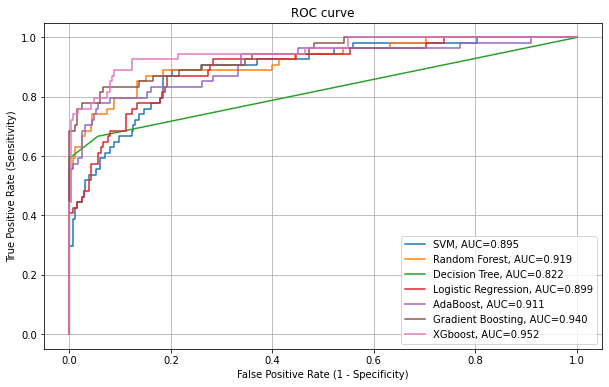

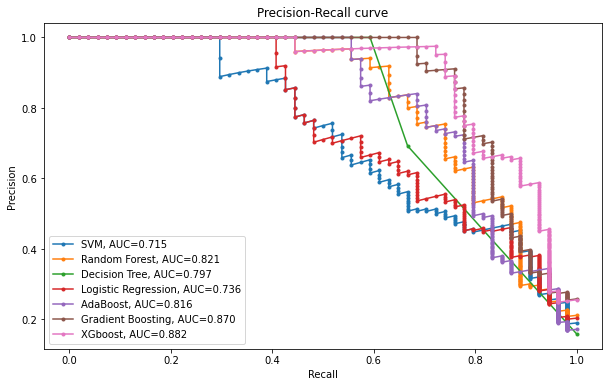

In [11]:
fig = plt.figure(figsize=(10,6))  # a new figure window
ax = fig.add_subplot(1, 1, 1)
ax.set_title('ROC curve')
ax.set_xlabel('False Positive Rate (1 - Specificity)')
ax.set_ylabel('True Positive Rate (Sensitivity)')
ax.grid(True)


fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_title('Precision-Recall curve')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')


for c in classifiers:
    clf=c["classifier"]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true=y_test
    print("classification report for {}\n".format(c["name"]))
    print(classification_report(y_test,y_pred))

    yhat = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
    yhat = yhat[:, 1]

#plot roc curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)
    ax.plot(fpr, tpr,label=c["name"]+", AUC=%.3f" % auc(fpr, tpr))
    ax.legend()

#plot precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, yhat)
    ax2.plot(recall, precision, marker='.', label=c["name"]+", AUC=%.3f" % auc(recall, precision))
    ax2.legend()

#finally print Area Under the Curve of each precision-recall curve
    print("AUC=%.3f" % auc(recall, precision))        

# SMOTE-OVERSAMPLING

In [19]:
svm_c_range=np.arange(0.2,0.41,0.01)
param_grid1 = {"SVM__C":svm_c_range}

class_weights=['balanced','balanced_subsample']
max_depth_range=np.arange(4,14)
param_grid2 = {"Random Forest__max_depth":max_depth_range,"Random Forest__class_weight":class_weights}

max_leaf_nodes_range=np.arange(3,12)
param_grid3 = {"Decision Tree__max_depth":max_depth_range,"Decision Tree__max_leaf_nodes":max_leaf_nodes_range}

log_reg_pen=["l1","l2"]
log_reg_c=np.arange(0.1,0.5,0.05)
param_grid4 = {"Logistic Regression__penalty":log_reg_pen,"Logistic Regression__C":log_reg_c}

estimators=np.arange(50,200,10)
param_grid5 ={"AdaBoost__n_estimators":estimators}

grad_boost_lrate=np.arange(0.05,0.21,0.01)
param_grid6 ={"Gradient Boosting__n_estimators":estimators,"Gradient Boosting__learning_rate":grad_boost_lrate}

scale_pos_weight=np.arange(1,7)
param_grid7 ={"XGboost__scale_pos_weight":scale_pos_weight}

In [20]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ("SMOTE_OVER",SMOTE()),("XGboost", XGBClassifier(use_label_encoder=False))])

In [23]:
evaluate_pipelines(pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7)

Best: 0.871569 using {'SVM__C': 0.38000000000000017}
('accuracy',)
0.868235 (0.029357) with: {'SVM__C': 0.2}
0.869412 (0.026236) with: {'SVM__C': 0.21000000000000002}
0.870980 (0.030260) with: {'SVM__C': 0.22000000000000003}
0.869412 (0.029310) with: {'SVM__C': 0.23000000000000004}
0.869804 (0.025448) with: {'SVM__C': 0.24000000000000005}
0.870392 (0.028797) with: {'SVM__C': 0.25000000000000006}
0.871176 (0.024175) with: {'SVM__C': 0.26000000000000006}
0.869216 (0.026205) with: {'SVM__C': 0.2700000000000001}
0.870392 (0.025975) with: {'SVM__C': 0.2800000000000001}
0.870588 (0.028211) with: {'SVM__C': 0.2900000000000001}
0.868824 (0.022638) with: {'SVM__C': 0.3000000000000001}
0.870784 (0.029936) with: {'SVM__C': 0.3100000000000001}
0.868235 (0.028802) with: {'SVM__C': 0.3200000000000001}
0.869020 (0.030068) with: {'SVM__C': 0.3300000000000001}
0.871176 (0.030954) with: {'SVM__C': 0.34000000000000014}
0.868039 (0.025309) with: {'SVM__C': 0.35000000000000014}
0.869608 (0.026529) with: {'

# RandomOverSampling

In [25]:
svm_c_range=np.arange(0.1,0.2,0.01)
param_grid1 = {"SVM__C":svm_c_range}

class_weights=['balanced','balanced_subsample']
max_depth_range=np.arange(4,10)
param_grid2 = {"Random Forest__max_depth":max_depth_range,"Random Forest__class_weight":class_weights}

max_leaf_nodes_range=np.arange(3,10)
param_grid3 = {"Decision Tree__max_depth":max_depth_range,"Decision Tree__max_leaf_nodes":max_leaf_nodes_range}

log_reg_pen=["l1","l2"]
log_reg_c=np.arange(0.4,1,0.05)
param_grid4 = {"Logistic Regression__penalty":log_reg_pen,"Logistic Regression__C":log_reg_c}

estimators=np.arange(300,600,50)
param_grid5 ={"AdaBoost__n_estimators":estimators}

grad_boost_lrate=np.arange(0.05,0.21,0.01)
param_grid6 ={"Gradient Boosting__n_estimators":estimators,"Gradient Boosting__learning_rate":grad_boost_lrate}

scale_pos_weight=np.arange(1,7)
param_grid7 ={"XGboost__scale_pos_weight":scale_pos_weight}

In [26]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("Random Forest", RandomForestClassifier(random_state=1234))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ('over', RandomOverSampler(sampling_strategy='minority')),("XGboost", XGBClassifier(use_label_encoder=False))])

In [27]:
evaluate_pipelines(pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7)

Best: 0.861176 using {'SVM__C': 0.13}
('accuracy',)
0.858039 (0.025312) with: {'SVM__C': 0.1}
0.859020 (0.026676) with: {'SVM__C': 0.11}
0.857843 (0.027215) with: {'SVM__C': 0.12}
0.861176 (0.026551) with: {'SVM__C': 0.13}
0.858824 (0.029215) with: {'SVM__C': 0.13999999999999999}
0.856078 (0.027871) with: {'SVM__C': 0.14999999999999997}
0.858627 (0.028917) with: {'SVM__C': 0.15999999999999998}
0.859608 (0.027995) with: {'SVM__C': 0.16999999999999998}
0.861176 (0.026551) with: {'SVM__C': 0.17999999999999997}
0.858824 (0.028333) with: {'SVM__C': 0.18999999999999995}
('f1',)
0.645084 (0.057627) with: {'SVM__C': 0.1}
0.646165 (0.059848) with: {'SVM__C': 0.11}
0.644835 (0.059380) with: {'SVM__C': 0.12}
0.649027 (0.060948) with: {'SVM__C': 0.13}
0.644457 (0.065143) with: {'SVM__C': 0.13999999999999999}
0.640108 (0.058956) with: {'SVM__C': 0.14999999999999997}
0.646318 (0.062107) with: {'SVM__C': 0.15999999999999998}
0.644622 (0.064633) with: {'SVM__C': 0.16999999999999998}
0.648304 (0.057559